In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/grapes_project/samples/uvas

/content/gdrive/MyDrive/grapes_project/samples/uvas


In [3]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   grapes_excecution.ipynb
	modified:   splash_line_cross.py
	modified:   splash_line_cross_inference.py
	modified:   utils/notebooks/plot_pickles_results.ipynb
	modified:   utils/text_utils.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	utils/notebooks/inspect_satellite_images.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


### Create Mega Pickle

In [ ]:
!python utils/create_mega_pickle.py --pickles_dir stuff/pickles/dcompleto_pgrapes/

Saving data frame to mega pickle...
  CAMPO_ID  ... RACIMO_AREA
0        2  ...       19890
1        2  ...       10250
2        2  ...        9306
3        2  ...       16400
4        2  ...       16680

[5 rows x 6 columns]


### Group by cuartel

In [ ]:
!python utils/group_by_cuartel.py --locations_dir=stuff/pickles/dcompleto_pgrapes/location_pickles/


Location dir: stuff/pickles/dcompleto_pgrapes/location_pickles/


### Create HeatMap

In [ ]:
!python heat_map_generation/generate_heatmaps.py \
          --campo stuff/pickles/dcompleto_pgrapes/location_pickles/ \
          --img stuff/satellite_images/curicoMap.jpg  \
          --megapk stuff/pickles/dcompleto_pgrapes/mega_pickle.pkl \
          --boundary 80 \

stuff/pickles/dcompleto_pgrapes/mega_pickle.pkl
     CAMPO_ID  ... RACIMO_AREA
0           2  ...       19890
1           2  ...       10250
2           2  ...        9306
3           2  ...       16400
4           2  ...       16680
...       ...  ...         ...
2866        2  ...        4263
2867        2  ...        7920
2868        2  ...        3024
2869        2  ...        2944
2870        2  ...        1517

[2871 rows x 6 columns]


Show result image

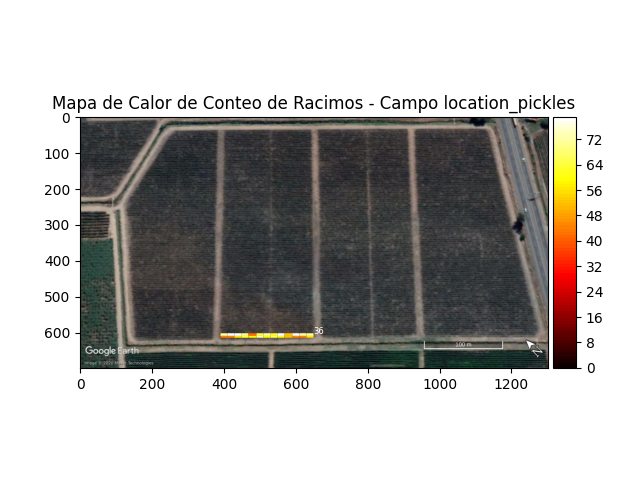

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("stuff/heat_maps/location_pickles.png")
cv2_imshow(img)

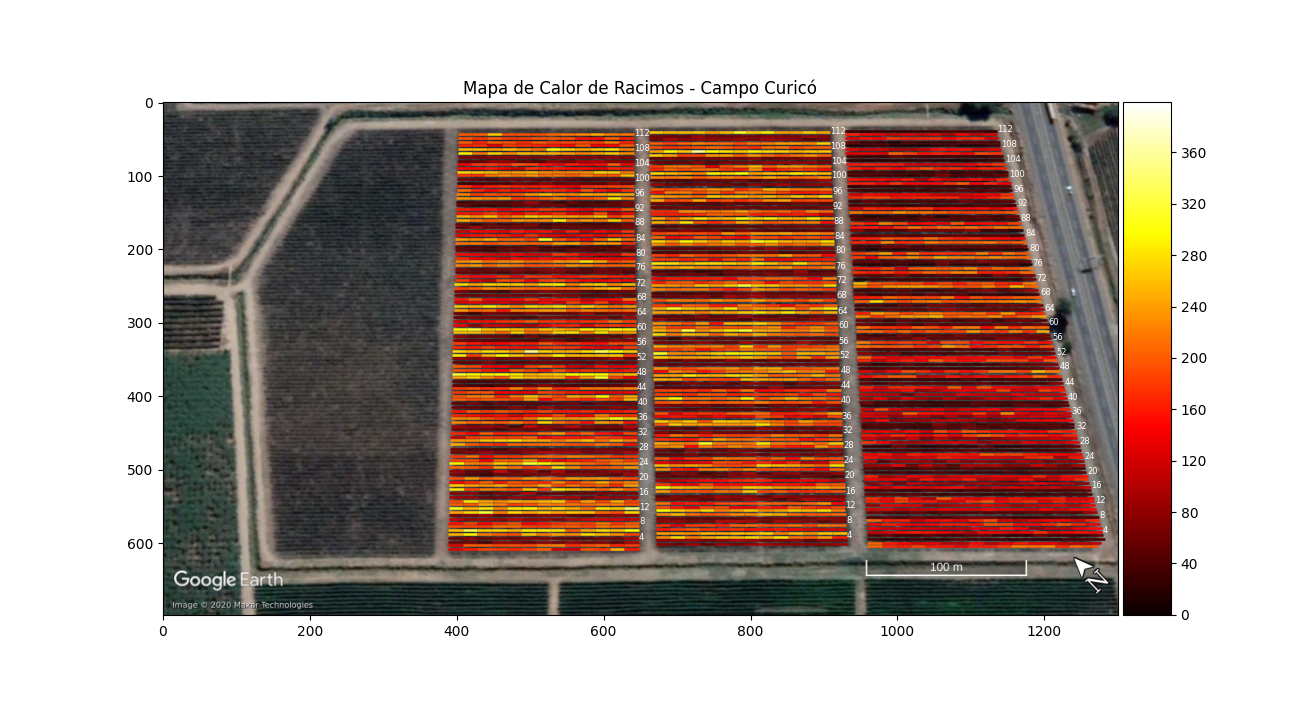

In [ ]:
img = cv2.imread("heat_map_generation/heatMaps/heatMapCurico.png")
cv2_imshow(img)

In [ ]:
!ls stuff/input_videos/processed/Curico

Hilera_2_2_36_1.MOV  Hilera_2_2_37_1.MOV
Hilera_2_2_36_2.MOV  Hilera_2_2_37_2.MOV


In [ ]:
%cd ../../

/content/gdrive/MyDrive/grapes_project


In [ ]:
!git commit -m 'notebook excecution'

[main cc5bb19] notebook excecution
 1 file changed, 1 insertion(+)
 create mode 100644 samples/uvas/grapes_excecution.ipynb


In [ ]:
!git config --global user.email 'tubarao0705@gmail.com'
!git config --global user.name "tubaher"

In [ ]:
!git push origin master

error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/Tubaher/grapes_project.git'


In [6]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!python utils/get_masks_npz.py --dataset_dir stuff/dataset/curico_dataset_2/

In [ ]:
!python utils/get_masks_npz.py --dataset_dir stuff/dataset/curico_dataset_3/ 

In [ ]:
!python utils/get_masks_npz.py --dataset_dir stuff/dataset/curico_dataset_4/ 

In [ ]:
!bash utils/concat_datasets.sh stuff/dataset/curico/ stuff/dataset/dataset_WGISD/

In [ ]:
!python utils/filter_with_mask.py --data_dir stuff/dataset/concat_dataset/

In [ ]:
!python utils/split_data.py  --dataset_dir stuff/dataset/concat_dataset/

In [ ]:
!python train.py --weights stuff/pretrained_weights/mask_rcnn_uvas_0050.h5 --logs stuff/logs/model_dcomplete_pgrapes_aug/ --dataset stuff/dataset/wgisd_curico/

Error in atexit._run_exitfuncs:
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 593, in _terminate_pool
    task_handler.join()
  File "/usr/lib/python3.6/threading.py", line 1056, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.6/threading.py", line 1072, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt


In [ ]:
!pip install imagecorruptions

     |████████████████████████████████| 2.1MB 12.5MB/s 


In [ ]:
import imgaug.augmenters.imgcorruptlike

     |████████████████████████████████| 952kB 14.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
!git pull splash_line_cross.py

In [ ]:
!python splash_uvas.py --weights stuff/logs/model_dcompleto_pgrapes/uvas20210126T1517/mask_rcnn_uvas_0022.h5 --video stuff/input_videos/processed/TestCampo/Hilera_2_2_37_2.MOV --pickles_dir stuff/pickles/dcomplete_pgrapes --output_dir stuff/output_videos/dcomplete_pgrapes

In [ ]:
!python splash_uvas.py --weights stuff/logs/model_dcompleto_pballoon/uvas20210125T1749/mask_rcnn_uvas_0017.h5 --video stuff/input_videos/processed/TestCampo/Hilera_2_2_37_2.MOV --pickles_dir stuff/pickles/dcomplete_pballoon/ --output_dir stuff/output_videos/dcomplete_pballoon

In [ ]:
!python splash_uvas.py --weights stuff/logs/model_dcompleto_pcoco/uvas20210125T2110/mask_rcnn_uvas_0020.h5 --video stuff/input_videos/processed/TestCampo/Hilera_2_2_37_2.MOV --pickles_dir stuff/pickles/dcomplete_pcoco/ --output_dir stuff/output_videos/dcomplete_pcoco

In [ ]:
!python splash_uvas.py --weights stuff/logs/model_dcompleto_pballoon/uvas20210125T1749/mask_rcnn_uvas_0017.h5 --video stuff/input_videos/processed/TestCampo/Hilera_2_2_37_2.MOV --pickles_dir stuff/pickles/dcomplete_pballoon/ --output_dir stuff/output_videos/dcomplete_pballoon

In [ ]:
!python splash_uvas.py --weights stuff/logs/model_dwgisd_pcoco/uvas20210126T1951/mask_rcnn_uvas_0020.h5 --video stuff/input_videos/processed/TestCampo/Hilera_2_2_37_2.MOV --pickles_dir stuff/pickles/dwgisd_pcoco/ --output_dir stuff/output_videos/dwgisg_pcoco

In [ ]:
!python splash_line_cross.py --weights stuff/logs/model_dcompleto_pgrapes/uvas20210126T1517/mask_rcnn_uvas_0022.h5 --video stuff/input_videos/processed/Curico/Hilera_2_2_38_1.MOV --pickles_dir stuff/pickles/dcompleto_pgrapes/ --output_dir stuff/output_videos/dcompleto_pgrapes/

Using TensorFlow backend.


2021-02-02 14:48:16.329683: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-02-02 14:48:16.330001: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3eabc00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-02-02 14:48:16.330041: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-02-02 14:48:16.332750: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-02-02 14:48:16.506023: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-02 14:48:16.507248: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3eabdc0 initialized for platform CUDA (this does not guarantee that XLA will be used). 

In [ ]:
!python splash_line_cross.py --weights stuff/logs/model_dcompleto_pgrapes/uvas20210126T1517/mask_rcnn_uvas_0022.h5 --video stuff/input_videos/processed/Curico/Hilera_2_2_37_1.MOV --pickles_dir stuff/pickles/dcompleto_pgrapes/ --output_dir stuff/output_videos/dcompleto_pgrapes/

Streaming output truncated to the last 5000 lines.
[INFO] Frame: 4515
[INFO] Frame: 4516
[INFO] Frame: 4517
[INFO] Frame: 4518
[INFO] Frame: 4519
[INFO] Time per Frame: 0:00:00.212619 FPS: 8.00.
[INFO] Frame: 4520
[INFO] Frame: 4521
[INFO] Frame: 4522
[INFO] Frame: 4523
[INFO] Frame: 4524
[INFO] Frame: 4525
[INFO] Frame: 4526
[INFO] Frame: 4527
[INFO] Time per Frame: 0:00:00.186489 FPS: 8.00.
[INFO] Frame: 4528
[INFO] Frame: 4529
[INFO] Frame: 4530
[INFO] Frame: 4531
[INFO] Frame: 4532
[INFO] Frame: 4533
[INFO] Frame: 4534
[INFO] Frame: 4535
[INFO] Time per Frame: 0:00:00.187046 FPS: 8.00.
[INFO] Frame: 4536
[INFO] Frame: 4537
[INFO] Frame: 4538
[INFO] Frame: 4539
[INFO] Frame: 4540
[INFO] Frame: 4541
[INFO] Frame: 4542
[INFO] Frame: 4543
[INFO] Time per Frame: 0:00:00.205948 FPS: 8.00.
[INFO] Frame: 4544
[INFO] Frame: 4545
[INFO] Frame: 4546
[INFO] Frame: 4547
[INFO] Frame: 4548
[INFO] Frame: 4549
[INFO] Frame: 4550
[INFO] Frame: 4551
[INFO] Time per Frame: 0:00:00.212851 FPS: 8.00.
[

In [ ]:
!python splash_line_cross.py --weights stuff/logs/model_dcompleto_pgrapes/uvas20210126T1517/mask_rcnn_uvas_0022.h5 --video stuff/input_videos/processed/Curico/Hilera_2_2_36_2.MOV --pickles_dir stuff/pickles/dcompleto_pgrapes/ --output_dir stuff/output_videos/dcompleto_pgrapes/

Streaming output truncated to the last 5000 lines.
[INFO] Frame: 3348
[INFO] Frame: 3349
[INFO] Frame: 3350
[INFO] Frame: 3351
[INFO] Time per Frame: 0:00:00.184249 FPS: 8.00.
[INFO] Frame: 3352
[INFO] Frame: 3353
[INFO] Frame: 3354
[INFO] Frame: 3355
[INFO] Frame: 3356
[INFO] Frame: 3357
[INFO] Frame: 3358
[INFO] Frame: 3359
[INFO] Time per Frame: 0:00:00.176438 FPS: 8.00.
[INFO] Frame: 3360
[INFO] Frame: 3361
[INFO] Frame: 3362
[INFO] Frame: 3363
[INFO] Frame: 3364
[INFO] Frame: 3365
[INFO] Frame: 3366
[INFO] Frame: 3367
[INFO] Time per Frame: 0:00:00.179946 FPS: 8.00.
[INFO] Frame: 3368
[INFO] Frame: 3369
[INFO] Frame: 3370
[INFO] Frame: 3371
[INFO] Frame: 3372
[INFO] Frame: 3373
[INFO] Frame: 3374
[INFO] Frame: 3375
[INFO] Time per Frame: 0:00:00.181586 FPS: 8.00.
[INFO] Frame: 3376
[INFO] Frame: 3377
[INFO] Frame: 3378
[INFO] Frame: 3379
[INFO] Frame: 3380
[INFO] Frame: 3381
[INFO] Frame: 3382
[INFO] Frame: 3383
[INFO] Time per Frame: 0:00:00.182177 FPS: 8.00.
[INFO] Frame: 3384
[

In [ ]:
!python splash_line_cross.py --weights stuff/logs/model_dcomplete_pgrapes_aug/uvas20210128T1517/mask_rcnn_uvas_0020.h5 --video stuff/input_videos/processed/Curico/Hilera_2_2_38_1.MOV --pickles_dir stuff/pickles/dcomplete_pgrapes_aug/ --output_dir stuff/output_videos/dcomplete_pgrapes_aug/

In [11]:
!python splash_line_cross_inference.py --weights stuff/logs/model_dcomplete_pgrapes_aug/uvas20210128T1517/mask_rcnn_uvas_0020.h5 --video stuff/input_videos/processed/Curico/Hilera_2_2_38_1.MOV --pickles_dir stuff/pickles/dcomplete_pgrapes_aug/ 

Using TensorFlow backend.


2021-02-03 16:20:44.439016: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2021-02-03 16:20:44.443677: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000204999 Hz
2021-02-03 16:20:44.443840: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5876bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-02-03 16:20:44.443903: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-02-03 16:20:44.445701: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-02-03 16:20:44.546632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-0

In [10]:
!python splash_line_cross_inference.py --weights stuff/logs/model_dcomplete_pgrapes_aug/uvas20210128T1517/mask_rcnn_uvas_0020.h5 --video stuff/input_videos/processed/Curico/Hilera_2_2_38_1.MOV --pickles_dir stuff/pickles/dcomplete_pgrapes_aug/ 

Using TensorFlow backend.


2021-02-03 16:11:50.873386: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2021-02-03 16:11:50.877952: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000204999 Hz
2021-02-03 16:11:50.878114: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x52eebc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-02-03 16:11:50.878161: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-02-03 16:11:50.879891: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-02-03 16:11:50.975611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-0

In [ ]:
!python splash_line_cross.py --weights stuff/logs/model_dcomplete_pgrapes_aug/uvas20210128T1517/mask_rcnn_uvas_0020.h5 --video stuff/input_videos/processed/TestCampo/Hilera_2_2_37_2.MOV --pickles_dir stuff/pickles/dcomplete_pgrapes_aug --output_dir stuff/output_videos/dcomplete_pgrapes_aug

^C
